<a href="https://colab.research.google.com/github/Leonardo1133/Garmin_MLOps/blob/main/modeling_prototyped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling

En este notebook haremos un prototipado de la primera iteracion para la creacion del modelo, mas adelante haremos distintos modulos para cada parte del codigo: Preprocessing, Training, Evaluation, etc. De esta forma construiremos el flujo orquestado para MLOps. 


## 1) Ingest
En este primer paso tomamos los datos obtenidos en el notebook de "download_data.ipynb" que guardamos en nuestro Drive para comenzar con la creacion del modelo, inicialmente como una primera iteracion, considerando algunas variables (no la totalidad).

In [1]:
import pandas as pd

In [2]:
# Leemos los datos alojados en drive
activities = '/content/drive/MyDrive/Colab/Modelos/Garmin/Activities.csv'
df = pd.read_csv(activities)

In [3]:
df.head()

,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,Frecuencia cardiaca máxima,Cadencia de carrera media,...,Temperatura mínima,Intervalo en superficie,Descompresión,Mejor tiempo de vuelta,Número de vueltas,Temperatura máxima,Tiempo en movimiento,Tiempo transcurrido,Altura mínima,Altura máxima
0,Carrera,2022-04-18 18:07:50,False,Carrera,2.64,224,00:19:33,155,177,146,...,0.0,0:00,No,06:09.63,3,0.0,00:17:46,00:19:33,--,--
1,Cardio,2020-04-26 15:16:34,False,Cardio,1.07,116,00:10:26,130,148,--,...,0.0,0:00,No,10:26.30,1,0.0,00:07:16,00:10:26,--,--
2,Cardio,2020-04-22 12:53:41,False,Cardio,1.12,127,00:11:03,135,154,--,...,0.0,0:00,No,11:02.74,1,0.0,00:07:26,00:11:03,--,--
3,Cardio,2020-04-21 12:48:05,False,Cardio,1.17,121,00:11:28,128,152,--,...,0.0,0:00,No,00:00.00,1,0.0,00:08:25,00:11:28,--,--
4,Cardio,2020-04-20 12:57:08,False,Cardio,1.24,168,00:14:55,133,161,--,...,0.0,0:00,No,00:00.00,1,0.0,00:08:40,00:14:55,--,--


## 2) Analisis Exploratorio y Preprocessing
En esta parte haremos algunas transformaciones sobre las variables, y tambien graficaremos. Se seleccionan las siguientes Features:

- Actividad: Es la actividad que estamos realizando, puede ser Caminar, Correr o Cardio.
- Distancia: Es la cantidad de metros que recorremos al hacer una actividad.
- Tiempo: Tiempo transcurrido al hacer una actividad.
- Frecuencia Cardiaca: Son las pulsaciones por unidad de tiempo al hacer una actividad.

Las tres primeras corresponden a las features del modelo, y la cuarta corrsponde al objetivo o target del modelo, que es la Frecuencia Cardiaca media.

In [4]:
col = df.columns.to_list()
col

['Tipo de actividad',
 'Fecha',
 'Favorito',
 'Título',
 'Distancia',
 'Calorías',
 'Tiempo',
 'Frecuencia cardiaca media',
 'Frecuencia cardiaca máxima',
 'Cadencia de carrera media',
 'Cadencia de carrera máxima',
 'Ritmo medio',
 'Ritmo óptimo',
 'Descenso total',
 'Longitud media de zancada',
 'Relación vertical media',
 'Oscilación vertical media',
 'Training Stress Score®',
 'Dificultad',
 'Fluidez',
 'Tiempo de inmersión',
 'Temperatura mínima',
 'Intervalo en superficie',
 'Descompresión',
 'Mejor tiempo de vuelta',
 'Número de vueltas',
 'Temperatura máxima',
 'Tiempo en movimiento',
 'Tiempo transcurrido',
 'Altura mínima',
 'Altura máxima']

In [5]:
col_sel = [
 'Tipo de actividad',
 'Distancia',
 'Tiempo transcurrido',
  'Frecuencia cardiaca media'
 ]

In [6]:
df_sel = df[col_sel]
df_sel.head(3)

,Tipo de actividad,Distancia,Tiempo transcurrido,Frecuencia cardiaca media
0,Carrera,2.64,00:19:33,155
1,Cardio,1.07,00:10:26,130
2,Cardio,1.12,00:11:03,135


In [7]:
# Renombramos las col
df_sel.columns = ['actividad', 'distancia', 'tiempo', 'frecCard']
df_sel.head()
# df_sel.to_csv('data.csv')

,actividad,distancia,tiempo,frecCard
0,Carrera,2.64,00:19:33,155
1,Cardio,1.07,00:10:26,130
2,Cardio,1.12,00:11:03,135
3,Cardio,1.17,00:11:28,128
4,Cardio,1.24,00:14:55,133


In [8]:
df = df_sel
df.head(3)

,actividad,distancia,tiempo,frecCard
0,Carrera,2.64,00:19:33,155
1,Cardio,1.07,00:10:26,130
2,Cardio,1.12,00:11:03,135


In [ ]:
# # transformamos distancia a metros
# df = df_sel
# df['distancia'] = df['distancia'] * 1000
# df.head()

In [9]:
# Transformamos tiempo a segundos
df['tiempo'] = pd.to_timedelta(df['tiempo']).astype('timedelta64[s]').astype(int)
df.head()

,actividad,distancia,tiempo,frecCard
0,Carrera,2.64,1173,155
1,Cardio,1.07,626,130
2,Cardio,1.12,663,135
3,Cardio,1.17,688,128
4,Cardio,1.24,895,133


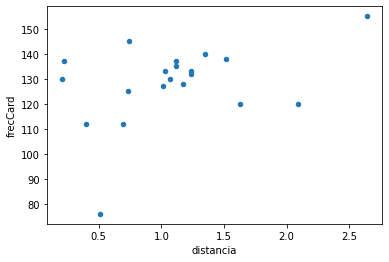

In [10]:
df.plot.scatter(x='distancia', y='frecCard')

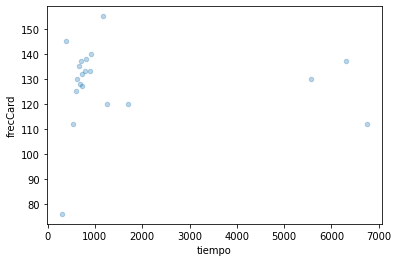

In [ ]:
df_sel.plot.scatter(x='tiempo', y='frecCard',  alpha=0.3)

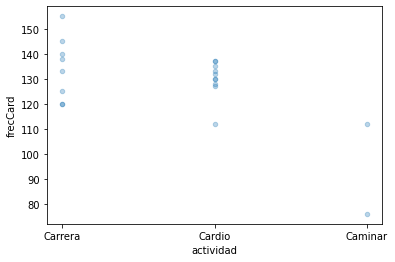

In [ ]:
df_sel.plot.scatter(x='actividad', y='frecCard',  alpha=0.3)

In [11]:
# Categorias de la variable
df['actividad'].unique()

array(['Carrera', 'Cardio', 'Caminar'], dtype=object)

In [13]:
# Hacemos un encoding basico para la variable actividad
encoding_df = pd.get_dummies(df['actividad'], prefix_sep='_',prefix='actividad')
encoding_df.head()

,actividad_Caminar,actividad_Cardio,actividad_Carrera
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [14]:
# Concatenamos las nuevas variables al df
df = pd.concat([df, encoding_df], axis=1)
df.head()

,actividad,distancia,tiempo,frecCard,actividad_Caminar,actividad_Cardio,actividad_Carrera
0,Carrera,2.64,1173,155,0,0,1
1,Cardio,1.07,626,130,0,1,0
2,Cardio,1.12,663,135,0,1,0
3,Cardio,1.17,688,128,0,1,0
4,Cardio,1.24,895,133,0,1,0


In [15]:
# Eliminamos la variable actividad, porque ya fue reemplazada por otras tres variables
df.drop('actividad', axis=1, inplace=True)
df.head()

,distancia,tiempo,frecCard,actividad_Caminar,actividad_Cardio,actividad_Carrera
0,2.64,1173,155,0,0,1
1,1.07,626,130,0,1,0
2,1.12,663,135,0,1,0
3,1.17,688,128,0,1,0
4,1.24,895,133,0,1,0


In [16]:
# Separamos Features de Target
X = df.drop(['frecCard'], axis=1)
X.head()

,distancia,tiempo,actividad_Caminar,actividad_Cardio,actividad_Carrera
0,2.64,1173,0,0,1
1,1.07,626,0,1,0
2,1.12,663,0,1,0
3,1.17,688,0,1,0
4,1.24,895,0,1,0


In [17]:
# Creamos el target en otra variable
y = df['frecCard']
y.head()

0    155
1    130
2    135
3    128
4    133
Name: frecCard, dtype: int64

In [18]:
# Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_test

,distancia,tiempo,actividad_Caminar,actividad_Cardio,actividad_Carrera
0,2.64,1173,0,0,1
17,0.69,534,1,0,0
15,1.35,916,0,0,1
1,1.07,626,0,1,0


# 4) Modeling

## XGBoost

#### XGBoost's hyperparameters
At this point, before building the model, you should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost and you can read all about them here. But the most common ones that you should know are:

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.
- objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the booster parameter to either gbtree (default),gblinear or dart.



In [27]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(
    objective ='reg:linear', 
    colsample_bytree = 0.3, 
    learning_rate = 0.1,
    max_depth = 5, 
    alpha = 10, 
    n_estimators = 10
)

In [41]:
xg_reg.fit(X_train,y_train)

[14:53:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [ ]:
# Tuning de Hiperparametros


# 5) Validation

In [50]:
preds = xg_reg.predict(X_test)
preds

array([80.890816, 57.259235, 80.890816, 80.890816], dtype=float32)

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 59.988187


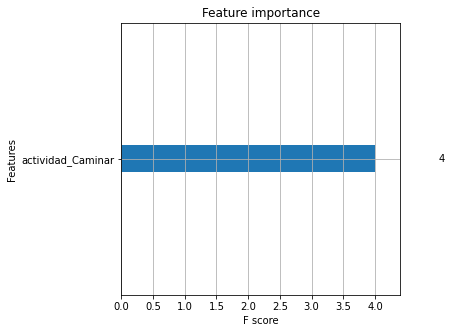

In [48]:
import matplotlib as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 10]
# plt.show()

# 6) Conclusiones
- Hemos creado un modelo de regresion simple para predecir la frecuencia cardiaca media. Se usaron muy pocos datos, la idea es sumar todos los datos historicos de los ultimos 3 años para obtener mejores resultados.
- En una proxima iteracion se agregaran mas variables para predecir el target, para evaluar si se obtienen mejores resultados.
- Se separara el codigo en distintos modulos: preprocessing, training, evaluation, para poner en produccion el modelo.
- Se haran cambios en el codigo para ejecutar las distintas etapas en distintas instancias de AWS.